# Time Series Ruben Serdons: Air Quality Data of India

In [136]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# if your Jupyter kernel crashes during this code, use this setting
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [137]:
%cd Data
df = pd.concat( 
    map(pd.read_csv, ['AP001.csv', 'AP002.csv', 'AP003.csv', 'AP004.csv', 'AP005.csv']), ignore_index=True)
df = df.reset_index()

c:\Users\ruben\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


[WinError 2] The system cannot find the file specified: 'Data'
c:\Users\ruben\Documents\PXL\LapinAMK\git_repo\Lapland\Deep_Learning\P3\Data


In [138]:
df.head(5)

,index,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),...,BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C),Eth-Benzene (ug/m3),MP-Xylene (ug/m3),O Xylene (ug/m3),VWS (degree),WD (degree)
0,0,2016-07-01 10:00:00,2016-07-01 11:00:00,10.67,39.0,17.67,39.2,32.33,7.07,6.60,...,NaN,-0.1,0.1,0.0,23.05,NaN,NaN,NaN,NaN,NaN
1,1,2016-07-01 11:00:00,2016-07-01 12:00:00,2.00,39.0,20.50,41.9,35.80,7.40,NaN,...,NaN,-0.1,0.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2016-07-01 12:00:00,2016-07-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2016-07-01 13:00:00,2016-07-01 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2016-07-01 14:00:00,2016-07-01 15:00:00,20.50,50.0,15.40,43.6,32.78,6.35,6.38,...,NaN,-0.1,0.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
df.describe()

,index,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),...,BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C),Eth-Benzene (ug/m3),MP-Xylene (ug/m3),O Xylene (ug/m3),VWS (degree),WD (degree)
count,257096.000000,201912.000000,205284.000000,208180.000000,207811.000000,209421.000000,204189.000000,203307.000000,204992.000000,200679.000000,...,152483.000000,192696.000000,164695.000000,210733.000000,208790.000000,30944.000000,96647.000000,16274.000000,18159.000000,135191.000000
mean,128547.500000,36.018311,75.657772,9.045869,26.481941,21.998022,11.979207,9.983216,0.673470,32.524218,...,751.266969,-0.006968,1.108042,0.039069,26.726748,1.383695,0.729169,2.581664,4.823643,187.311718
std,74217.366741,33.991246,56.598663,15.749446,24.750839,23.195247,9.249100,8.499910,0.627465,27.069836,...,6.592266,0.126442,5.082347,0.398153,5.029512,11.591596,6.790269,16.531741,0.917050,70.784059
min,0.000000,0.030000,0.250000,0.010000,0.030000,0.000000,0.010000,0.030000,0.000000,0.020000,...,700.000000,-17.600000,0.000000,0.000000,4.500000,0.010000,0.020000,0.010000,-0.060000,7.000000
25%,64273.750000,14.500000,37.750000,1.880000,10.050000,7.380000,6.920000,5.100000,0.390000,13.720000,...,747.410000,-0.050000,0.100000,0.000000,23.000000,0.200000,0.100000,0.700000,5.000000,125.000000
50%,128547.500000,28.250000,64.250000,3.450000,18.320000,13.850000,10.350000,8.350000,0.590000,24.350000,...,751.330000,0.000000,0.300000,0.000000,26.650000,0.380000,0.100000,1.450000,5.000000,186.750000
75%,192821.250000,49.500000,98.750000,10.040000,34.350000,28.220000,15.320000,12.650000,0.840000,44.170000,...,756.000000,0.030000,1.000000,0.000000,30.100000,0.970000,0.400000,1.950000,5.000000,250.000000
max,257095.000000,985.000000,985.000000,487.380000,480.520000,494.400000,454.900000,199.770000,41.100000,199.920000,...,1050.000000,15.000000,410.850000,43.300000,51.110000,484.230000,484.230000,484.230000,5.000000,360.000000


In [140]:
df.isna().sum()

index                       0
From Date                   0
To Date                     0
PM2.5 (ug/m3)           55184
PM10 (ug/m3)            51812
NO (ug/m3)              48916
NO2 (ug/m3)             49285
NOx (ppb)               47675
NH3 (ug/m3)             52907
SO2 (ug/m3)             53789
CO (mg/m3)              52104
Ozone (ug/m3)           56417
Benzene (ug/m3)         48673
Toluene (ug/m3)         48700
Temp (degree C)         90926
RH (%)                  47611
WS (m/s)                47619
WD (deg)               185370
SR (W/mt2)              49545
BP (mmHg)              104613
VWS (m/s)               64400
Xylene (ug/m3)          92401
RF (mm)                 46363
AT (degree C)           48306
Eth-Benzene (ug/m3)    226152
MP-Xylene (ug/m3)      160449
O Xylene (ug/m3)       240822
VWS (degree)           238937
WD (degree)            121905
dtype: int64

We see that for the following columns it is not worth keeping them since they have too much NA.

In [141]:
# dropping columns with more than 50% missing values

columns_to_drop = [
    'Eth-Benzene (ug/m3)', 
    'O Xylene (ug/m3)', 
    'VWS (degree)', 
    'MP-Xylene (ug/m3)', 
    'WD (deg)', 
    'Xylene (ug/m3)' 
]

df = df.drop(columns=columns_to_drop, axis=1)

In [142]:
# imputing where possible (with mean strategy)
from sklearn.impute import SimpleImputer

columns_to_impute = [
    'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)',
    'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Temp (degree C)', 'RH (%)', 
    'WS (m/s)', 'SR (W/mt2)', 'BP (mmHg)', 'RF (mm)'
]

imputer = SimpleImputer(strategy='mean')
df_imputed = df.copy()
df_imputed[columns_to_impute] = imputer.fit_transform(df_imputed[columns_to_impute])

In [143]:
df_imputed.isna().sum()

index                   0
From Date               0
To Date                 0
PM2.5 (ug/m3)           0
PM10 (ug/m3)            0
NO (ug/m3)              0
NO2 (ug/m3)             0
NOx (ppb)               0
NH3 (ug/m3)         52907
SO2 (ug/m3)             0
CO (mg/m3)              0
Ozone (ug/m3)           0
Benzene (ug/m3)     48673
Toluene (ug/m3)     48700
Temp (degree C)         0
RH (%)                  0
WS (m/s)                0
SR (W/mt2)              0
BP (mmHg)               0
VWS (m/s)           64400
RF (mm)                 0
AT (degree C)       48306
WD (degree)        121905
dtype: int64

We still have some NA's. Let's handle them.

In [144]:
df_cleaned = df_imputed.drop(columns=['WD (degree)'])

columns_to_impute_2 = ['NH3 (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 
                       'VWS (m/s)', 'AT (degree C)']

imputer = SimpleImputer(strategy='mean')

df_cleaned[columns_to_impute_2] = imputer.fit_transform(df_cleaned[columns_to_impute_2])

In [145]:
df_cleaned.isna().sum()

index              0
From Date          0
To Date            0
PM2.5 (ug/m3)      0
PM10 (ug/m3)       0
NO (ug/m3)         0
NO2 (ug/m3)        0
NOx (ppb)          0
NH3 (ug/m3)        0
SO2 (ug/m3)        0
CO (mg/m3)         0
Ozone (ug/m3)      0
Benzene (ug/m3)    0
Toluene (ug/m3)    0
Temp (degree C)    0
RH (%)             0
WS (m/s)           0
SR (W/mt2)         0
BP (mmHg)          0
VWS (m/s)          0
RF (mm)            0
AT (degree C)      0
dtype: int64

Now our dataset is cleaned.

In [146]:
# We are also going to drop the 'To Date' column as it is not needed
df_cleaned.drop(columns=['To Date'], inplace=True)

In [147]:
# Now we will replace the Date column and old index column with a sequence number
df_cleaned['sequence'] = df.index + 1
df_cleaned.drop(columns=['index', 'From Date'], axis=1)

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3),Temp (degree C),RH (%),WS (m/s),SR (W/mt2),BP (mmHg),VWS (m/s),RF (mm),AT (degree C),sequence
0,10.670000,39.000000,17.670000,39.200000,32.330000,7.070000,6.600000,0.48000,14.500000,1.000000,4.630000,33.430000,71.670000,2.300000,123.670000,751.266969,-0.100000,0.000000,23.050000,1
1,2.000000,39.000000,20.500000,41.900000,35.800000,7.400000,9.983216,0.49000,15.000000,0.700000,4.500000,33.700000,70.000000,2.500000,186.000000,751.266969,-0.100000,0.000000,26.726748,2
2,36.018311,75.657772,9.045869,26.481941,21.998022,11.979207,9.983216,0.67347,32.524218,1.402308,4.367571,29.480351,71.334621,2.103934,118.060831,751.266969,-0.006968,0.039069,26.726748,3
3,36.018311,75.657772,9.045869,26.481941,21.998022,11.979207,9.983216,0.67347,32.524218,1.402308,4.367571,29.480351,71.334621,2.103934,118.060831,751.266969,-0.006968,0.039069,26.726748,4
4,20.500000,50.000000,15.400000,43.600000,32.780000,6.350000,6.380000,0.47000,10.500000,0.600000,4.500000,33.570000,63.500000,1.880000,240.500000,751.266969,-0.100000,0.000000,26.726748,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257091,31.250000,58.250000,2.500000,4.970000,4.700000,18.020000,10.130000,1.12000,30.620000,0.000000,0.200000,28.800000,78.500000,4.830000,12.000000,753.000000,0.030000,0.000000,27.950000,257092
257092,27.000000,45.670000,1.070000,3.930000,2.930000,18.930000,10.200000,1.15000,20.830000,0.000000,0.070000,28.600000,81.000000,4.730000,12.000000,753.330000,0.030000,0.000000,27.170000,257093
257093,23.000000,43.000000,1.500000,4.100000,3.400000,18.830000,9.030000,1.23000,16.970000,0.000000,0.030000,27.500000,83.330000,3.300000,12.000000,754.000000,0.000000,0.000000,26.800000,257094
257094,21.500000,40.500000,1.470000,5.050000,3.880000,18.470000,11.080000,1.21000,14.950000,0.000000,0.330000,27.320000,85.750000,2.980000,12.000000,754.750000,0.000000,0.000000,26.480000,257095


Split the DF into timesteps

In [148]:
from numpy.lib.stride_tricks import sliding_window_view

timestep_size = 50

# separate the output variable
ozone = df_cleaned['Ozone (ug/m3)'].values
pm25 = df_cleaned['PM2.5 (ug/m3)'].values

# generate timestep windows for each signal
ozone_windows = sliding_window_view(ozone, window_shape=timestep_size)
pm25_windows = sliding_window_view(pm25, window_shape=timestep_size)

# combine into X and y 
# use vstack to combine ozone and pm 2.5 back together
X = np.vstack((ozone_windows, pm25_windows))

# generate zeroes and ones for the output categories
# 0 = ozone
# `1 = pm 2.5
y = np.array([0] * len(ozone_windows) + [1] * len(pm25_windows))

print("X:", X.shape)
print("y:", y.shape)

X: (514094, 50)
y: (514094,)


In [149]:
from sklearn.utils import shuffle

# shuffle the data
X, y = shuffle(X, y, random_state=42)

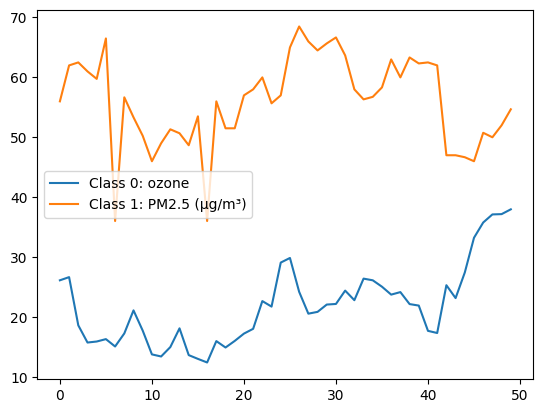

In [150]:
test_signal_index = 2

c_x_train = X[y == 0]
plt.plot(c_x_train[test_signal_index], label="Class 0: ozone")

c_x_train = X[y == 1]
plt.plot(c_x_train[test_signal_index], label="Class 1: PM2.5 (µg/m³)")
plt.legend()

Now we will do the train/test split

In [151]:
# define the cutoff point
train_size = 0.7
splitter = int(len(X) * train_size)

# split to train/test
x_train = X[0:splitter]
x_test = X[splitter:]
y_train = y[0:splitter]
y_test = y[splitter:]

In [152]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

359865
154229
359865
154229


In [153]:
x_train

array([[ 36.01831055,  36.01831055,  36.01831055, ...,  36.01831055,
         36.01831055,  36.01831055],
       [ 65.78      ,  41.5       ,  40.12      , ...,  65.8       ,
         54.7       ,  40.7       ],
       [ 60.67      ,  66.5       ,  53.        , ...,  61.        ,
         54.25      ,  53.75      ],
       ...,
       [ 36.01831055,  36.01831055,  36.01831055, ...,  36.01831055,
         36.01831055,  36.01831055],
       [103.88      ,  95.27      ,  99.75      , ..., 144.62      ,
        143.43      , 135.6       ],
       [  4.25      ,  12.5       ,  17.75      , ...,   2.75      ,
          2.25      ,   3.25      ]])

In [154]:
# convert the data into the required CNN -format
# usuallu the easiest approach is to modify
# your own data to follow the data format used by another example 
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [155]:
x_train

array([[[ 36.01831055],
        [ 36.01831055],
        [ 36.01831055],
        ...,
        [ 36.01831055],
        [ 36.01831055],
        [ 36.01831055]],

       [[ 65.78      ],
        [ 41.5       ],
        [ 40.12      ],
        ...,
        [ 65.8       ],
        [ 54.7       ],
        [ 40.7       ]],

       [[ 60.67      ],
        [ 66.5       ],
        [ 53.        ],
        ...,
        [ 61.        ],
        [ 54.25      ],
        [ 53.75      ]],

       ...,

       [[ 36.01831055],
        [ 36.01831055],
        [ 36.01831055],
        ...,
        [ 36.01831055],
        [ 36.01831055],
        [ 36.01831055]],

       [[103.88      ],
        [ 95.27      ],
        [ 99.75      ],
        ...,
        [144.62      ],
        [143.43      ],
        [135.6       ]],

       [[  4.25      ],
        [ 12.5       ],
        [ 17.75      ],
        ...,
        [  2.75      ],
        [  2.25      ],
        [  3.25      ]]])

In [156]:
class_names = np.array(["ozon", "PM2.5"])
num_classes = len(class_names)
classes = [0, 1]

def make_model(input_shape):
    model = keras.Sequential(
        [
            # input layer
            keras.layers.Input(input_shape),

            # convolutional layer 1 (we usually have 1-3 convolutional layers
            # depending how much and how complex the data is) -> "model capacity / decision space"
            keras.layers.Conv1D(filters=64, kernel_size=3, padding="same"),
            keras.layers.BatchNormalization(),
            keras.layers.ReLU(),

            # pooling + flatten (adapter from convolutional to dense)
            # flattening is done only once after the final convolutional layer 
            # and before the Dense-network
            keras.layers.GlobalAveragePooling1D(),
            keras.layers.Flatten(),

            # neural network Dense-tail
            keras.layers.Dense(64, activation="relu"),

            # output layer
            keras.layers.Dense(num_classes, activation="softmax")
        ]
    )

    return model


model = make_model(input_shape=x_train.shape[1:])

# pip install pydot -> restart Kernel
# keras.utils.plot_model(model, show_shapes=True)

In [157]:
epochs = 200
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model2.keras", save_best_only=True, monitor="val_loss"
    ),

]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/200
8997/8997 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.6176 - sparse_categorical_accuracy: 0.6556 - val_loss: 0.5457 - val_sparse_categorical_accuracy: 0.7658
Epoch 2/200
8997/8997 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.5513 - sparse_categorical_accuracy: 0.7157 - val_loss: 0.5169 - val_sparse_categorical_accuracy: 0.7864
Epoch 3/200
8997/8997 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.5181 - sparse_categorical_accuracy: 0.7386 - val_loss: 0.4884 - val_sparse_categorical_accuracy: 0.7397
Epoch 4/200
8997/8997 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.4991 - sparse_categorical_accuracy: 0.7517 - val_loss: 0.4700 - val_sparse_categorical_accuracy: 0.7572
Epoch 5/200
8997/8997 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.4874 - sparse_categorical_accuracy: 0.7584 - val_loss: 0.4860 - val_sparse_categorical_accuracy: 0.8076
Epoch 6/200
8997/8997 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.4759 - sparse_categorical_accuracy: 0.7657 - val_loss: 0.4938 - val_sparse_categoric

<Axes: >

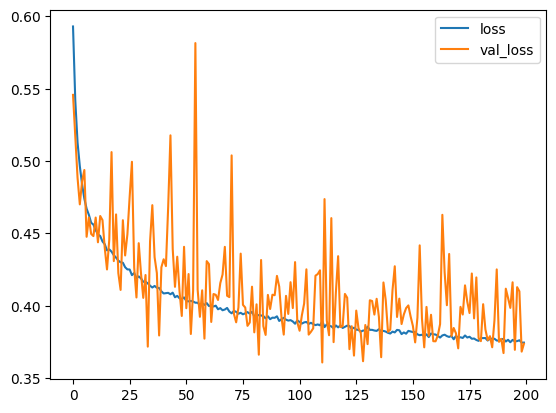

In [158]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

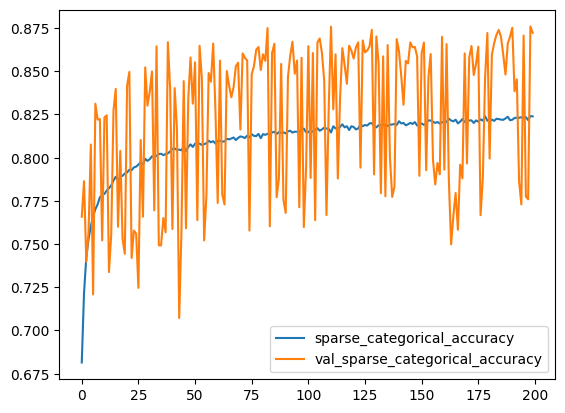

In [159]:
loss_df[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()

In [160]:
# compare the final model loss/accuracy/evaluation values
# the values should again match mostly
print("Test data evaluation:")
print(model.evaluate(x_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(x_train, y_train, verbose=0))

Test data evaluation:
[0.3752363324165344, 0.869492769241333]

Train data evaluation:
[0.37258315086364746, 0.8707042932510376]


In [161]:
# get predictions and convert with argmax() to get categories 
# instead of raw probabilities
test_predictions = model.predict(x_test)
test_predictions = np.argmax(test_predictions, axis=1)

4820/4820 ━━━━━━━━━━━━━━━━━━━━ 4s 849us/step


<Axes: >

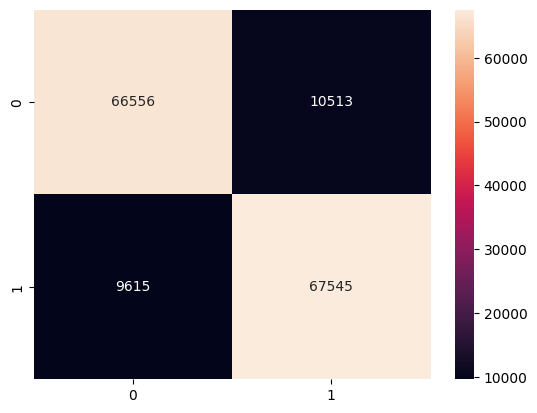

In [162]:
# confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')

In [163]:
# print the classification report based on true values and predictions
print(classification_report(y_test, test_predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     77069
           1       0.87      0.88      0.87     77160

    accuracy                           0.87    154229
   macro avg       0.87      0.87      0.87    154229
weighted avg       0.87      0.87      0.87    154229


Model overall accuracy: 86.95%


In [165]:
# save the model
model.save("time_series_model.keras")